In [15]:
import pandas as pd

# Load CSV
df = pd.read_csv("BEED_Data.csv")

# Inspect the first few rows
print(df.head())


    X1   X2   X3   X4   X5   X6  X7  X8  X9  X10  X11  X12  X13  X14  X15  \
0    4    7   18   25   28   27  20  10 -10  -18  -20  -16   13   32   12   
1   87  114  120  106   76   54  28   5 -19  -49  -85 -102 -100  -89  -61   
2 -131 -133 -140 -131 -123 -108 -58 -51 -70  -77  -76  -76  -73  -57  -40   
3   68  104   73   34  -12  -26 -38 -36 -67  -88  -25   31   18   -4    6   
4  -67  -90  -97  -94  -86  -71 -43 -11  23   46   58   50   39   19   -9   

   X16  y  
0   10  0  
1  -21  0  
2  -14  0  
3  -29  0  
4  -41  0  


In [16]:
# Check shape
print("Shape:", df.shape)

Shape: (8000, 17)


In [17]:
# Check for missing values
print(df.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64


In [18]:
# Check class distribution
print(df['y'].value_counts())

y
0    2000
1    2000
2    2000
3    2000
Name: count, dtype: int64


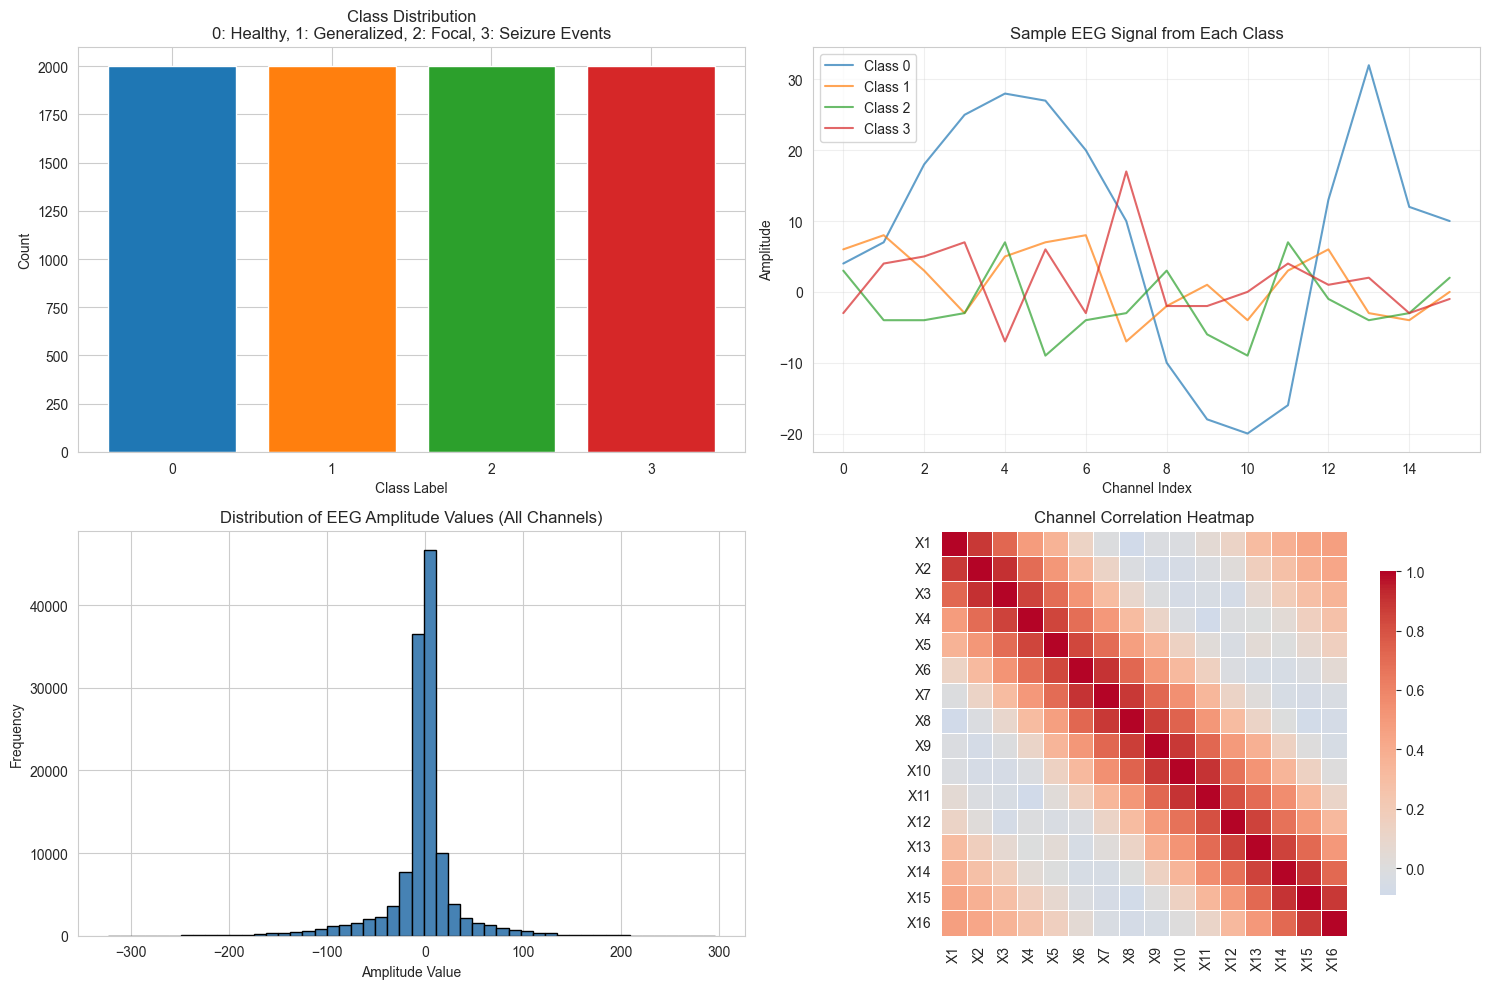


=== Dataset Statistics ===
                X1           X2          X3           X4           X5  \
count  8000.000000  8000.000000  8000.00000  8000.000000  8000.000000   
mean     -1.490375    -2.189375    -3.23750    -4.119375    -1.821625   
std      36.824213    36.108088    35.80249    36.285268    37.621284   
min    -281.000000  -255.000000  -255.00000  -257.000000  -264.000000   
25%      -7.000000    -7.000000    -7.00000   -10.000000   -10.000000   
50%       0.000000     0.000000    -1.00000    -1.000000     0.000000   
75%       8.000000     8.000000     5.00000     7.000000    10.000000   
max     252.000000   261.000000   238.00000   246.000000   249.000000   

                X6           X7           X8           X9         X10  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.00000   
mean     -2.311750    -3.398125    -3.448625    -1.647875    -2.56125   
std      36.306006    36.358395    36.522214    38.107721    37.54068   
min    -277.000000  -2

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Create visualizations for EDA

# 1. Class distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Bar plot of class distribution
axes[0, 0].bar(df['y'].value_counts().index, df['y'].value_counts().values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[0, 0].set_xlabel('Class Label')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Class Distribution\n0: Healthy, 1: Generalized, 2: Focal, 3: Seizure Events')
axes[0, 0].set_xticks([0, 1, 2, 3])

# 2. Sample EEG signals for each class
for class_label in range(4):
    sample = df[df['y'] == class_label].iloc[0, :-1].values
    axes[0, 1].plot(sample, label=f'Class {class_label}', alpha=0.7)
axes[0, 1].set_xlabel('Channel Index')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('Sample EEG Signal from Each Class')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of values across all channels
axes[1, 0].hist(df.iloc[:, :-1].values.flatten(), bins=50, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Amplitude Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of EEG Amplitude Values (All Channels)')

# 4. Correlation heatmap of channels
correlation_matrix = df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, ax=axes[1, 1], cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
axes[1, 1].set_title('Channel Correlation Heatmap')

plt.tight_layout()
plt.show()

# Basic statistics summary
print("\n=== Dataset Statistics ===")
print(df.describe())

print("\n=== Statistics by Class ===")
for class_label in range(4):
    class_data = df[df['y'] == class_label].iloc[:, :-1]
    print(f"\nClass {class_label}:")
    print(f"  Mean amplitude: {class_data.values.mean():.2f}")
    print(f"  Std amplitude: {class_data.values.std():.2f}")
    print(f"  Min amplitude: {class_data.values.min():.2f}")
    print(f"  Max amplitude: {class_data.values.max():.2f}")

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.iloc[:, :-1].values  # All columns except 'y'
y = df['y'].values

print("Data Splitting and Normalization")
print(f"Original shape - X: {X.shape}, y: {y.shape}")

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set - X: {X_train.shape}, y: {y_train.shape}")
print(f"Test set - X: {X_test.shape}, y: {y_test.shape}")

Data Splitting and Normalization
Original shape - X: (8000, 16), y: (8000,)

Train set - X: (6400, 16), y: (6400,)
Test set - X: (1600, 16), y: (1600,)


In [21]:
# Standardize the features (important for neural networks and distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardization Results")
print(f"Original data - Mean: {X_train.mean():.2f}, Std: {X_train.std():.2f}")
print(f"Scaled data - Mean: {X_train_scaled.mean():.2f}, Std: {X_train_scaled.std():.2f}")



Standardization Results
Original data - Mean: -2.97, Std: 36.75
Scaled data - Mean: -0.00, Std: 1.00


C:\Users\USER\AppData\Local\Temp\ipykernel_12520\1650752658.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X_train[:, :16], labels=[f'X{i+1}' for i in range(16)])
C:\Users\USER\AppData\Local\Temp\ipykernel_12520\1650752658.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_train_scaled[:, :16], labels=[f'X{i+1}' for i in range(16)])


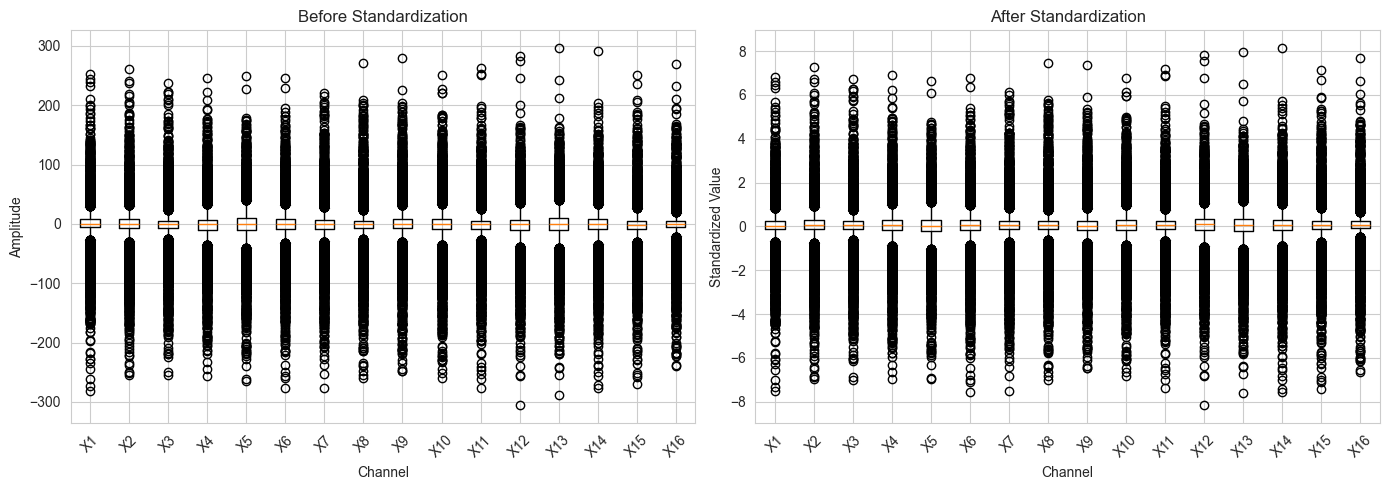

In [22]:
# Visualize the effect of standardization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before standardization
axes[0].boxplot(X_train[:, :16], labels=[f'X{i+1}' for i in range(16)])
axes[0].set_xlabel('Channel')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Before Standardization')
axes[0].tick_params(axis='x', rotation=45)

# After standardization
axes[1].boxplot(X_train_scaled[:, :16], labels=[f'X{i+1}' for i in range(16)])
axes[1].set_xlabel('Channel')
axes[1].set_ylabel('Standardized Value')
axes[1].set_title('After Standardization')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Extracting Spectral Features using FFT
FFT features shape - Train: (6400, 16), Test: (1600, 16)
FFT features - Mean: 0.5427, Std: 0.8399


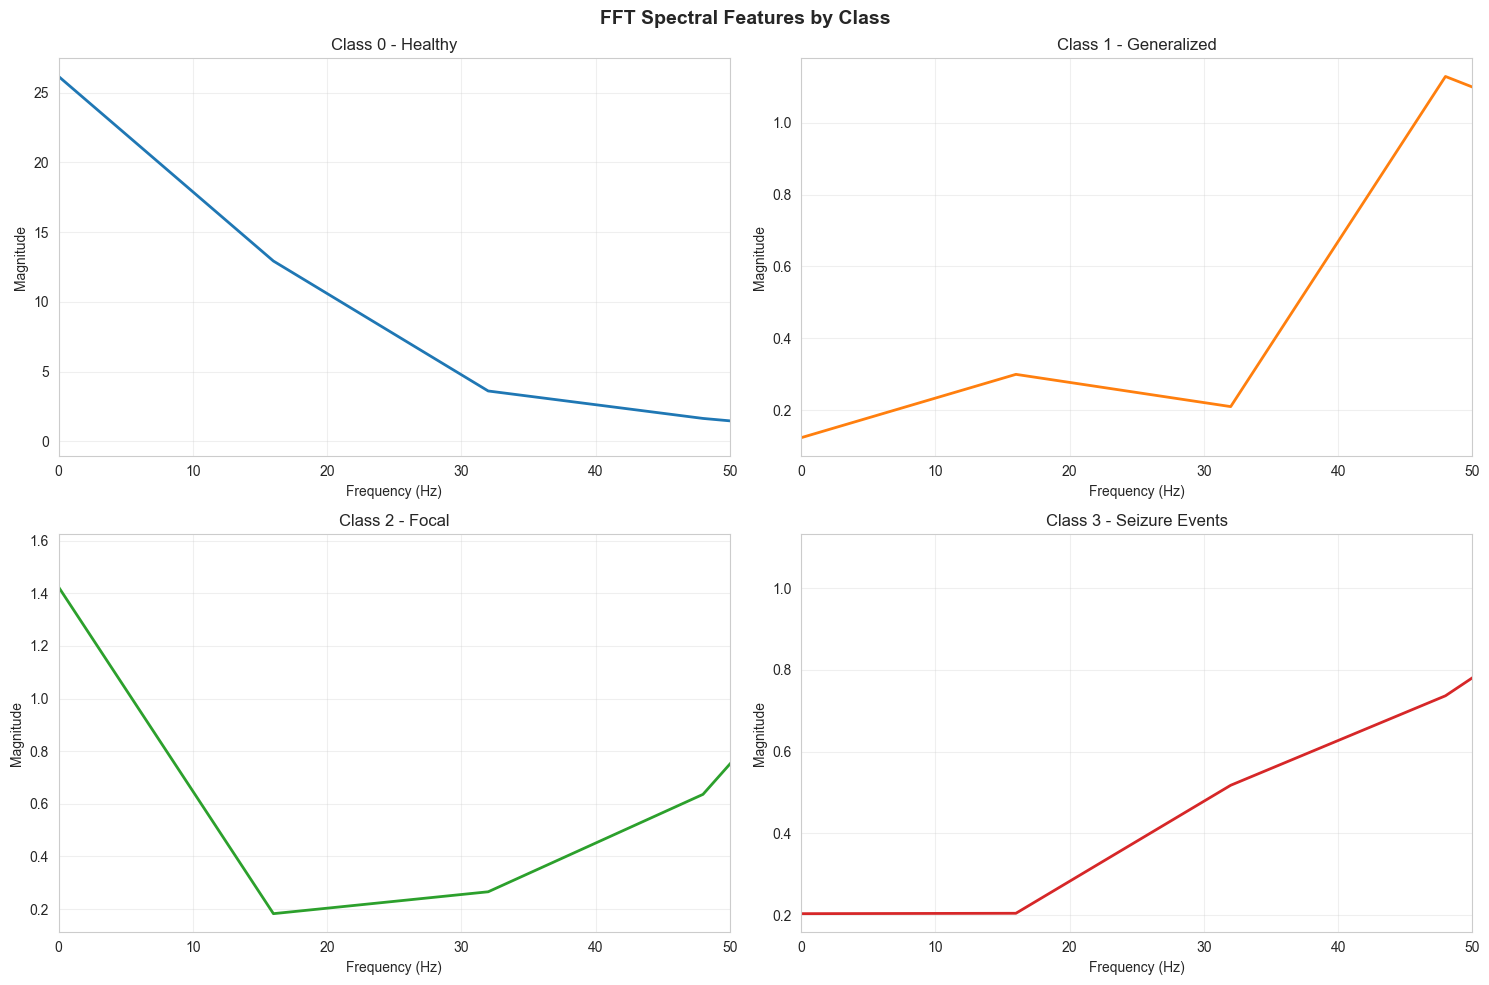

Average Power in Frequency Bands by Class 

Class 0 (Healthy):
  Delta (0.5-4 Hz): nan
  Theta (4-8 Hz): nan
  Alpha (8-13 Hz): nan
  Beta (13-30 Hz): 264.5536
  Gamma (30-50 Hz): 29.6834

Class 1 (Generalized):
  Delta (0.5-4 Hz): nan
  Theta (4-8 Hz): nan
  Alpha (8-13 Hz): nan
  Beta (13-30 Hz): 0.5375
  Gamma (30-50 Hz): 0.7761

Class 2 (Focal):
  Delta (0.5-4 Hz): nan
  Theta (4-8 Hz): nan
  Alpha (8-13 Hz): nan
  Beta (13-30 Hz): 0.2219
  Gamma (30-50 Hz): 0.2820

Class 3 (Seizure Events):
  Delta (0.5-4 Hz): nan
  Theta (4-8 Hz): nan
  Alpha (8-13 Hz): nan
  Beta (13-30 Hz): 0.4228
  Gamma (30-50 Hz): 0.6811

✓ FFT spectral feature extraction complete!


c:\Users\USER\OneDrive\Desktop\MACHINE LEARNING 2\myenv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\USER\OneDrive\Desktop\MACHINE LEARNING 2\myenv\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [23]:
from scipy.fft import fft, fftfreq
import numpy as np

# SPECTRAL FEATURE EXTRACTION USING FFT

def extract_fft_features(X, sampling_rate=256):
    """
    Apply FFT to extract frequency domain features from EEG signals.
    
    Parameters:
    - X: Input data (n_samples, n_channels)
    - sampling_rate: Sampling frequency (Hz)
    
    Returns:
    - FFT magnitude features (n_samples, n_channels)
    """
    n_samples, n_channels = X.shape
    fft_features = np.zeros((n_samples, n_channels))
    
    for i in range(n_samples):
        for j in range(n_channels):
            # Apply FFT to each channel
            fft_vals = fft(X[i, j:j+1])
            # Take magnitude (absolute value) and normalize
            fft_features[i, j] = np.abs(fft_vals[0])
    
    return fft_features

print("Extracting Spectral Features using FFT")

# Apply FFT to training and test data
X_train_fft = extract_fft_features(X_train_scaled)
X_test_fft = extract_fft_features(X_test_scaled)

print(f"FFT features shape - Train: {X_train_fft.shape}, Test: {X_test_fft.shape}")
print(f"FFT features - Mean: {X_train_fft.mean():.4f}, Std: {X_train_fft.std():.4f}")

# Visualize FFT features for sample signals from each class
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('FFT Spectral Features by Class', fontsize=14, fontweight='bold')

for idx, class_label in enumerate([0, 1, 2, 3]):
    row, col = idx // 2, idx % 2
    
    # Get first sample from this class in training set
    class_indices = np.where(y_train == class_label)[0]
    sample_idx = class_indices[0]
    
    # Original signal
    original_signal = X_train_scaled[sample_idx]
    
    # FFT of the signal
    fft_vals = np.fft.fft(original_signal)
    fft_magnitude = np.abs(fft_vals)
    frequencies = np.fft.fftfreq(len(original_signal), 1/256)
    
    # Plot only positive frequencies
    positive_freq_idx = frequencies >= 0
    
    axes[row, col].plot(frequencies[positive_freq_idx], 
                        fft_magnitude[positive_freq_idx], 
                        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][idx],
                        linewidth=2)
    axes[row, col].set_xlabel('Frequency (Hz)')
    axes[row, col].set_ylabel('Magnitude')
    axes[row, col].set_title(f'Class {class_label} - ' + 
                             ['Healthy', 'Generalized', 'Focal', 'Seizure Events'][class_label])
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_xlim(0, 50)  # Focus on 0-50 Hz range

plt.tight_layout()
plt.show()

# Compare frequency bands across classes
frequency_bands = {
    'Delta (0.5-4 Hz)': (0.5, 4),
    'Theta (4-8 Hz)': (4, 8),
    'Alpha (8-13 Hz)': (8, 13),
    'Beta (13-30 Hz)': (13, 30),
    'Gamma (30-50 Hz)': (30, 50)
}

print("Average Power in Frequency Bands by Class ")
for class_label in range(4):
    class_indices = np.where(y_train == class_label)[0]
    class_name = ['Healthy', 'Generalized', 'Focal', 'Seizure Events'][class_label]
    print(f"\nClass {class_label} ({class_name}):")
    
    for band_name, (low, high) in frequency_bands.items():
        band_power = []
        for idx in class_indices[:100]:  # Sample 100 from each class
            signal = X_train_scaled[idx]
            fft_vals = np.fft.fft(signal)
            freqs = np.fft.fftfreq(len(signal), 1/256)
            
            # Calculate power in this frequency band
            band_idx = (freqs >= low) & (freqs <= high)
            power = np.mean(np.abs(fft_vals[band_idx])**2)
            band_power.append(power)
        
        print(f"  {band_name}: {np.mean(band_power):.4f}")

print("\n✓ FFT spectral feature extraction complete!")

c:\Users\USER\OneDrive\Desktop\MACHINE LEARNING 2\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Extracting Temporal Features using UMAP 
Note: UMAP preserves local and global structure in high-dimensional data

Fitting UMAP on training data...
UMAP(n_components=3, n_jobs=1, random_state=42, verbose=True)
Thu Oct  2 09:15:24 2025 Construct fuzzy simplicial set
Thu Oct  2 09:15:24 2025 Finding Nearest Neighbors
Thu Oct  2 09:15:24 2025 Building RP forest with 9 trees


c:\Users\USER\OneDrive\Desktop\MACHINE LEARNING 2\myenv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Thu Oct  2 09:15:31 2025 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Thu Oct  2 09:15:49 2025 Finished Nearest Neighbor Search
Thu Oct  2 09:15:53 2025 Construct embedding


Epochs completed:   2%| ▏          8/500 [00:01]

	completed  0  /  500 epochs


Epochs completed:  11%| █          56/500 [00:04]

	completed  50  /  500 epochs


Epochs completed:  22%| ██▏        110/500 [00:07]

	completed  100  /  500 epochs


Epochs completed:  31%| ███        156/500 [00:09]

	completed  150  /  500 epochs


Epochs completed:  41%| ████▏      207/500 [00:12]

	completed  200  /  500 epochs


Epochs completed:  51%| █████      256/500 [00:15]

	completed  250  /  500 epochs


Epochs completed:  61%| ██████     306/500 [00:18]

	completed  300  /  500 epochs


Epochs completed:  72%| ███████▏   359/500 [00:21]

	completed  350  /  500 epochs


Epochs completed:  81%| ████████   405/500 [00:23]

	completed  400  /  500 epochs


Epochs completed:  91%| █████████  455/500 [00:26]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:28]


Thu Oct  2 09:16:22 2025 Finished embedding
Transforming test data...
Thu Oct  2 09:16:28 2025 Worst tree score: 0.83218750
Thu Oct  2 09:16:28 2025 Mean tree score: 0.84246528
Thu Oct  2 09:16:28 2025 Best tree score: 0.85250000
Thu Oct  2 09:16:33 2025 Forward diversification reduced edges from 96000 to 29619
Thu Oct  2 09:16:41 2025 Reverse diversification reduced edges from 29619 to 29619
Thu Oct  2 09:16:48 2025 Degree pruning reduced edges from 28906 to 28906
Thu Oct  2 09:16:48 2025 Resorting data and graph based on tree order
Thu Oct  2 09:16:48 2025 Building and compiling search function


Epochs completed:  16%| █▌         16/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs


Epochs completed:  30%| ███        30/100 [00:00]

	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs


Epochs completed:  69%| ██████▉    69/100 [00:00]

	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs


Epochs completed: 100%| ██████████ 100/100 [00:01]

	completed  80  /  100 epochs
	completed  90  /  100 epochs
UMAP features shape - Train: (6400, 3), Test: (1600, 3)
Reduced from 16 dimensions to 3 dimensions


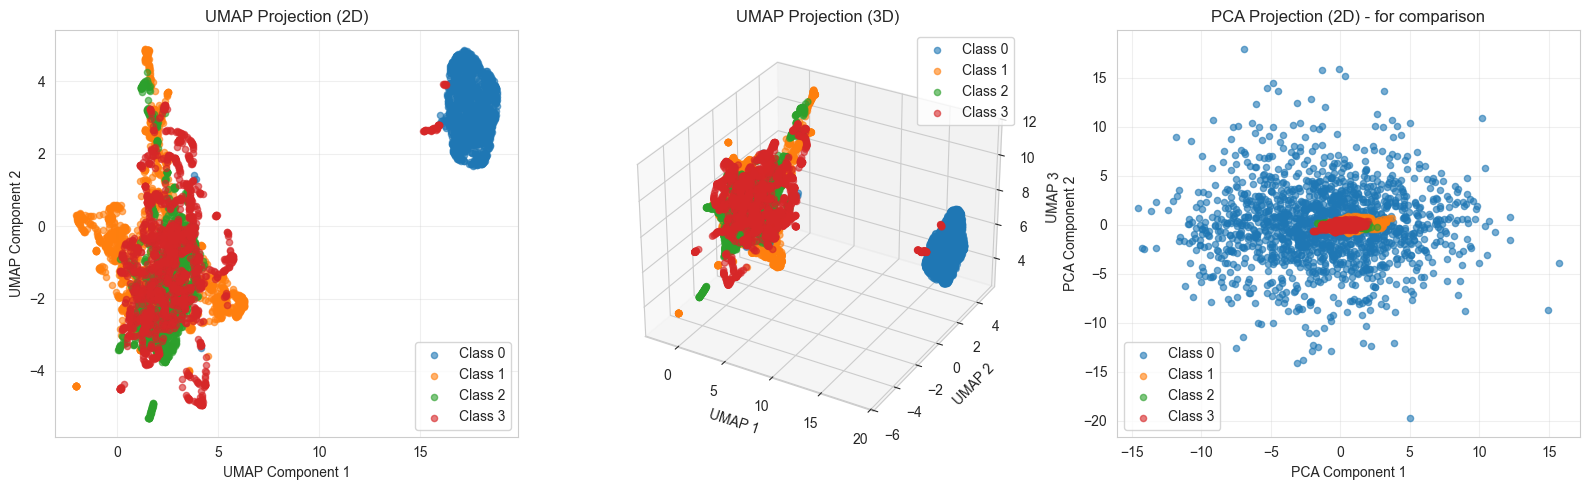

UMAP Statistics by Class
Class 0 (Healthy):
  UMAP Comp 1 - Mean: 17.3692, Std: 1.4307
  UMAP Comp 2 - Mean: 3.2178, Std: 0.8979
  UMAP Comp 3 - Mean: 5.4741, Std: 0.8992
Class 1 (Generalized):
  UMAP Comp 1 - Mean: 1.8970, Std: 1.9962
  UMAP Comp 2 - Mean: -0.4604, Std: 1.9536
  UMAP Comp 3 - Mean: 8.1027, Std: 1.4805
Class 2 (Focal):
  UMAP Comp 1 - Mean: 2.3938, Std: 0.8196
  UMAP Comp 2 - Mean: -1.5257, Std: 1.7498
  UMAP Comp 3 - Mean: 8.1177, Std: 1.1270
Class 3 (Seizure Events):
  UMAP Comp 1 - Mean: 2.8410, Std: 2.3733
  UMAP Comp 2 - Mean: -0.9188, Std: 1.8647
  UMAP Comp 3 - Mean: 8.1666, Std: 1.4356
✓ UMAP temporal feature extraction complete!


In [24]:
import umap
from sklearn.decomposition import PCA
# TEMPORAL FEATURE EXTRACTION USING UMAP

print("Extracting Temporal Features using UMAP ")
print("Note: UMAP preserves local and global structure in high-dimensional data")

# Configure UMAP for dimensionality reduction
# Reducing from 16 channels to 3 dimensions
umap_reducer = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42,
    verbose=True
)

# Fit UMAP on training data and transform both train and test
print("\nFitting UMAP on training data...")
X_train_umap = umap_reducer.fit_transform(X_train_scaled)

print("Transforming test data...")
X_test_umap = umap_reducer.transform(X_test_scaled)

print(f"UMAP features shape - Train: {X_train_umap.shape}, Test: {X_test_umap.shape}")
print(f"Reduced from {X_train_scaled.shape[1]} dimensions to {X_train_umap.shape[1]} dimensions")

# Visualize UMAP embeddings
fig = plt.figure(figsize=(16, 5))

# 2D visualization (first 2 components)
ax1 = fig.add_subplot(131)
for class_label in range(4):
    mask = y_train == class_label
    ax1.scatter(X_train_umap[mask, 0], X_train_umap[mask, 1], 
                alpha=0.6, s=20, 
                label=f'Class {class_label}',
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][class_label])
ax1.set_xlabel('UMAP Component 1')
ax1.set_ylabel('UMAP Component 2')
ax1.set_title('UMAP Projection (2D)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 3D visualization
ax2 = fig.add_subplot(132, projection='3d')
for class_label in range(4):
    mask = y_train == class_label
    ax2.scatter(X_train_umap[mask, 0], X_train_umap[mask, 1], X_train_umap[mask, 2],
                alpha=0.6, s=20,
                label=f'Class {class_label}',
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][class_label])
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
ax2.set_zlabel('UMAP 3')
ax2.set_title('UMAP Projection (3D)')
ax2.legend()

# Compare with PCA for reference
ax3 = fig.add_subplot(133)
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
for class_label in range(4):
    mask = y_train == class_label
    ax3.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1],
                alpha=0.6, s=20,
                label=f'Class {class_label}',
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][class_label])
ax3.set_xlabel('PCA Component 1')
ax3.set_ylabel('PCA Component 2')
ax3.set_title('PCA Projection (2D) - for comparison')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("UMAP Statistics by Class")
for class_label in range(4):
    class_name = ['Healthy', 'Generalized', 'Focal', 'Seizure Events'][class_label]
    mask = y_train == class_label
    class_umap = X_train_umap[mask]
    print(f"Class {class_label} ({class_name}):")
    print(f"  UMAP Comp 1 - Mean: {class_umap[:, 0].mean():.4f}, Std: {class_umap[:, 0].std():.4f}")
    print(f"  UMAP Comp 2 - Mean: {class_umap[:, 1].mean():.4f}, Std: {class_umap[:, 1].std():.4f}")
    print(f"  UMAP Comp 3 - Mean: {class_umap[:, 2].mean():.4f}, Std: {class_umap[:, 2].std():.4f}")

print("✓ UMAP temporal feature extraction complete!")